<a href="https://colab.research.google.com/github/Isaac92555/batch-size-test-student-version/blob/main/batch_size_test_student_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
# start your code here
os.chdir("/content/drive/MyDrive/Deep Learning/Homework5") # change your working folder here
# end your code here

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0. Batch size and epochs

When you train your model in TensorFlow, there is a parameter called batch-size, which is quite helpful in accelerating and stabilizing the learning process. 

```
model.fit(trainX, trainY, epochs=200, batch_size=64)
```
Here, 'epochs=200' means that you will reuse your data set for 200 times to train the neural network. 

'batch_size=64' means that in every epoch you are going to update your weights and bias once every 64 samples. If there is not enough samples left in the last batch, you will use the leftovers to update the weights and bias for the last time in this epoch. 

## 1. Batch, Stochastic, and Minibatch Gradient Descent Method.

###1.1 (Batch) Gradient Descent

At the very beginning of this course, we introduced the gradient descent (GD) method, which is for $l = 1, ..., L$: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

where L is the number of layers and $\alpha$ is the learning rate. For the ith sample, we can compute a derivative $dW^{[l](i)}$ and $db^{[l](i)}$. The derivaties $dW^{[l]}$ and $db^{[l]}$ are the average of $dW^{[l](i)}$ and $db^{[l](i)}$ for all samples. This method is also called the batch gradient descent method. If you want to use (batch) gradient method, the batch_size can be set to the number of samples.
```
model.fit(trainX, trainY, epochs=200, batch_size=trainX.shape[0])
```

### 1.2 Stochastic Gradient Descent
Stochastic gradient descent (SGD) method still use equation (1) and (2) to update the weights and bias. The difference is that instead of using the average gradient of all samples to update the weights and bias once for every epoch, SGD updates the weights and bias once for every sample using the derivatives of that sample. Assuming there are $m$ samples, SGD will update the weights and bias for m times. If SGD is used, the batch_size is set to be 1.

```
model.fit(trainX, trainY, epochs=200, batch_size=1)
```

### 1.3 Mini-Batch Gradient Descent
Mini-batch gradient descent (mini-batch GD) is something in between. In every epoch, GD updates too few times while SGD updates too many times. Mini-batch GD sets its batch_size somewhere between 1 and m, and generally provides faster training process.
```
model.fit(trainX, trainY, epochs=200, batch_size=64)
```
In Tensorflow, the default value for `batch_size` is 32. If you don't specify the batch_size, your batch_size is 32. The value of it is usually set to be the power of 2 to accommodate the binary property of CPU and GPU.

## 2. Testing batch_size on A Multi-Class Classification Problem

### 2.1 A Multi-Class Classification Problem
We will use a small multi-class classification problem as the basis to demonstrate the effect of batch size on learning.

The scikit-learn class provides the `make_blobs()` function that can be used to create a multi-class classification problem with the prescribed number of samples, input variables, classes, and variance of samples within a class.

The problem can be configured to have two input variables (to represent the x and y coordinates of the points, 'n_features') and a standard deviation of 2.0 for points within each group. We will use the same random state (seed for the pseudorandom number generator) to ensure that we always get the same data points.

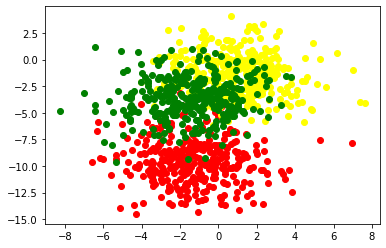

In [ ]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2) # 'n_samples: how many data points', 'centers: how many classes', 'n_features: how many element in every sample input', 'cluster_std: standard deviation of every classs', 'random_state: random seed for pseudorandom number generator'
# scatter plot for each class value
colors = ["r", "yellow", "g"]
for class_value in range(3):
	# select indices of points with the class label
	row_ix = np.where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1],color=colors[class_value])
# show plot
pyplot.show()

For multi-class classification problems, we usually transform the label of every sample (point) y to a one-hot vector. For example, 'red' (y=0) is [1 0 0], 'yellow' (y=1) is [0 1 0], and 'green' (y=2) is [0 0 1]. Because every vector has only 1 non-zero value, it is called a 'one-hot' vector.
![alt text](https://etlpoint.com/wp-content/uploads/2020/07/77.png)

In tensorflow, we can tranform the labels of samples to one hot vectors by calling

```
tf.keras.utils.to_categorical(y)
```
Please transform the lables (or the output of the dataset) to one hot vectors.



In [ ]:
# transform multi-class lables to one hot vectors
# start your code here
y_one_hot=tf.keras.utils.to_categorical(y)  # please replace None by a meaningful command
# end your code here
print('The dimension of input data is', X.shape)
print('The dimension of transformed output is', y_one_hot.shape)
print('The 3rd sample is green:',y_one_hot[2,:])

The dimension of input data is (1000, 2)
The dimension of transformed output is (1000, 3)
The 3rd sample is green: [0. 0. 1.]


The expected output:
```
The dimension of transformed lables is (1000, 3)
The 3rd sample is green: [0. 0. 1.]
```

### 2.2 Building neural network
We are going to build a shallow neural network to distinguish the 3 classes. Please use `functional API' to build a nerual network with

1. an input layer with appropriate shape
2. a hidden layer with 50 neurons and activation function 'relu'
3. an output layer with appropriate number of neurons and activation function 'softmax'.

Softmax function is usually used in the output layer in multi-class claasification problems.

In [ ]:
# start your code here
inputs=tf.keras.Input(shape=2) # please replace None by a meaningful command
hidden=tf.keras.layers.Dense(50,activation=tf.nn.relu)(inputs) # please replace None by a meaningful command
outputs=tf.keras.layers.Dense(3,activation=tf.nn.softmax)(hidden) # please replace None by a meaningful command
#end your code here
model=tf.keras.models.Model(inputs=inputs,outputs=outputs,name='shallow_model')
model.summary()
model.save('initial_model')

Model: "shallow_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 50)                150       
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: initial_model/assets


Expected output:
```
Model: "shallow_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 hidden_layer (Dense)        (None, 50)                150       
                                                                 
 output_layer (Dense)        (None, 3)                 153       
                                                                 
=================================================================
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________
```

### 2.3 Compiling and fitting neural network using batch GD
We first use batch GD to train the neurual network. Please make sure that the batch_size is the number of samples in the training data. If you set batch_size greater than the number of samples in the training data, the batch_size will be automatically adjusted to this number. 

The model will be trained for 200 epochs, and we split 20% of the data for validation.

In [ ]:
import time
modelGD=tf.keras.models.load_model('initial_model')
modelGD.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])
start_time = time.time()
# start your code here
historyGD = modelGD.fit(
    X, #please replace None by something meaningful
    y_one_hot, #please replace None by something meaningful
    validation_split=0.2, 
    epochs=200, 
    batch_size=X.shape[0]) #please replace None by something meaningful
# end your code here
print("Time taken: %.2fs" % (time.time() - start_time))

Epoch 1/200
1/1 [==============================] - 1s 810ms/step - loss: 0.9683 - accuracy: 0.5325 - val_loss: 0.8125 - val_accuracy: 0.5550
Epoch 2/200
1/1 [==============================] - 0s 38ms/step - loss: 0.8729 - accuracy: 0.5188 - val_loss: 0.7901 - val_accuracy: 0.6700
Epoch 3/200
1/1 [==============================] - 0s 35ms/step - loss: 0.8332 - accuracy: 0.6212 - val_loss: 0.7480 - val_accuracy: 0.6250
Epoch 4/200
1/1 [==============================] - 0s 39ms/step - loss: 0.8229 - accuracy: 0.5788 - val_loss: 0.7756 - val_accuracy: 0.7750
Epoch 5/200
1/1 [==============================] - 0s 40ms/step - loss: 0.8130 - accuracy: 0.6913 - val_loss: 0.7597 - val_accuracy: 0.6200
Epoch 6/200
1/1 [==============================] - 0s 56ms/step - loss: 0.8567 - accuracy: 0.5775 - val_loss: 0.7487 - val_accuracy: 0.7700
Epoch 7/200
1/1 [==============================] - 0s 52ms/step - loss: 0.7878 - accuracy: 0.6875 - val_loss: 0.7253 - val_accuracy: 0.6300
Epoch 8/200
1/1 [==

Expected output for the 1st 3 epochs:
```
Epoch 1/200
1/1 [==============================] - 1s 540ms/step - loss: 2.2440 - accuracy: 0.3363 - val_loss: 1.0965 - val_accuracy: 0.3750
Epoch 2/200
1/1 [==============================] - 0s 37ms/step - loss: 1.1960 - accuracy: 0.3487 - val_loss: 0.8725 - val_accuracy: 0.5550
Epoch 3/200
1/1 [==============================] - 0s 31ms/step - loss: 0.9020 - accuracy: 0.5475 - val_loss: 0.8096 - val_accuracy: 0.5450
...
Time taken: 11.34s
```
Your loss, accuracy, val_loss, and val_accuracy may be different, but we shall see
` 1/1 [==============================]` appears for every epoch and the time taken is similar. It indicates that you have 1 batch for every epoch.

The final 'accuracy' and 'val_accuracy' should be greater than `0.8`.


Now, let's print out the training history to see how the training process looks like.

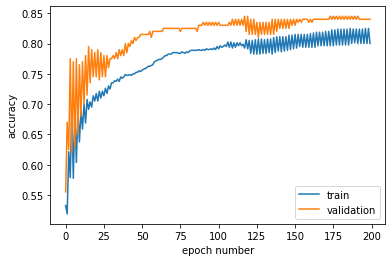

In [ ]:
from matplotlib import pyplot
# plot training history
pyplot.plot(historyGD.history['accuracy'], label='train')
pyplot.plot(historyGD.history['val_accuracy'], label='validation')
pyplot.xlabel('epoch number')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()

### 2.4 Compiling and fitting neural network using stochastic gradient descent
We will reload the untrained model and train it using stochastic gradient descent method. In this case, we will update the weights and bias once for every sample in the training data. Please review section 1.2 to figure out the batch_size for stochastic gradient descent method.

Again, the model will be trained for 200 epochs, and we split 20% of the data for validation.

In [ ]:
modelSGD=tf.keras.models.load_model('initial_model')
modelSGD.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])
start_time=time.time()
# start your code here
historySGD = modelSGD.fit(
    X, #please replace None by something meaningful
    y_one_hot, #please replace None by something meaningful
    validation_split=0.2, 
    epochs=200, 
    batch_size=0) #please replace None by something meaningful
# end your code here
print("Time taken: %.2fs" % (time.time() - start_time))

Epoch 1/200
800/800 [==============================] - 2s 2ms/step - loss: 0.9663 - accuracy: 0.5475 - val_loss: 1.0261 - val_accuracy: 0.5500
Epoch 2/200
800/800 [==============================] - 1s 2ms/step - loss: 0.9658 - accuracy: 0.5537 - val_loss: 1.1336 - val_accuracy: 0.4250
Epoch 3/200
800/800 [==============================] - 1s 2ms/step - loss: 0.9614 - accuracy: 0.5500 - val_loss: 0.8872 - val_accuracy: 0.6050
Epoch 4/200
800/800 [==============================] - 1s 2ms/step - loss: 0.9331 - accuracy: 0.5700 - val_loss: 0.8186 - val_accuracy: 0.6500
Epoch 5/200
800/800 [==============================] - 1s 2ms/step - loss: 0.9774 - accuracy: 0.5537 - val_loss: 0.9443 - val_accuracy: 0.5300
Epoch 6/200
800/800 [==============================] - 1s 2ms/step - loss: 0.9759 - accuracy: 0.5550 - val_loss: 0.9483 - val_accuracy: 0.4850
Epoch 7/200
800/800 [==============================] - 1s 2ms/step - loss: 0.8972 - accuracy: 0.5763 - val_loss: 0.7706 - val_accuracy: 0.7100

Expected output for the first 3 epochs:
```
Epoch 1/200
800/800 [==============================] - 2s 2ms/step - loss: 0.8803 - accuracy: 0.5938 - val_loss: 1.3032 - val_accuracy: 0.5000
Epoch 2/200
800/800 [==============================] - 1s 2ms/step - loss: 0.9080 - accuracy: 0.5562 - val_loss: 1.0528 - val_accuracy: 0.4600
Epoch 3/200
800/800 [==============================] - 1s 2ms/step - loss: 0.9684 - accuracy: 0.5688 - val_loss: 0.8736 - val_accuracy: 0.5950
...
Time taken: 382.39s
```
It's OK that you have different values in loss, accuracy, val_loss, and val_accuracy. But you should have `800/800 [==============================]` for every epoch. It indicates that you have `800` epochs for every epoch, which is the number of samples in the training data. Your 'Time taken' should be similar to ours without using any accerlerating device (GPU or TPU).

The final accuracy and val_accuracy should be greater than `0.4`.

Let's print the training history out.

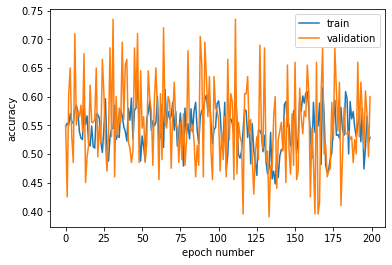

In [ ]:
# plot training history
pyplot.plot(historySGD.history['accuracy'], label='train')
pyplot.plot(historySGD.history['val_accuracy'], label='validation')
pyplot.xlabel('epoch number')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()

### 2.5 Compiling and fitting neural network using mini-batch gradient descent
We will reload the untrained model again and train it using mini-batch gradient descent method. Let batch_size=32, and see how training process looks like

Again, the model will be trained for 200 epochs, and we split 20% of the data for validation.

In [ ]:
model32=tf.keras.models.load_model('initial_model')
model32.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])
start_time=time.time()
# start your code here
history32 = model32.fit(
    X, #please replace None by something meaningful
    y_one_hot, #please replace None by something meaningful
    validation_split=0.2, 
    epochs=200, 
    batch_size=32) #please replace None by something meaningful
# end your code here
print("Time taken: %.2fs" % (time.time() - start_time))

Epoch 1/200
25/25 [==============================] - 1s 10ms/step - loss: 0.7863 - accuracy: 0.6513 - val_loss: 0.5976 - val_accuracy: 0.8000
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.7163 - val_loss: 0.5132 - val_accuracy: 0.8300
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.7600 - val_loss: 0.4846 - val_accuracy: 0.7850
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.7788 - val_loss: 0.4584 - val_accuracy: 0.8350
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7925 - val_loss: 0.4490 - val_accuracy: 0.8500
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7950 - val_loss: 0.4300 - val_accuracy: 0.8400
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5041 - accuracy: 0.7962 - val_loss: 0.4134 - val_accuracy: 0.8200
Epoch 8/200


Expected output:
```
Epoch 1/200
25/25 [==============================] - 1s 10ms/step - loss: 0.8676 - accuracy: 0.6388 - val_loss: 0.6800 - val_accuracy: 0.7900
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.7387 - val_loss: 0.5251 - val_accuracy: 0.8400
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5706 - accuracy: 0.7462 - val_loss: 0.5307 - val_accuracy: 0.8350
...
Time taken: 20.93s
```
You shall have `25/25 [==============================]` for every epoch, though the loss, accuracy, val_loss, val_accuracy might be different. Your 'Time taken' should be in the same level without using any accelerator (GPU or TPU). 

The final output need to be greater than `0.8`.

Now, let's print the history out. 

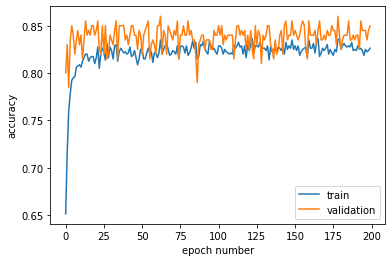

In [ ]:
# plot training history
pyplot.plot(history32.history['accuracy'], label='train')
pyplot.plot(history32.history['val_accuracy'], label='validation')
pyplot.xlabel('epoch number')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()

###2.6 Conclusion
To give you a more straightforward comparison of the three methods, we print the training histories of three methods all together.

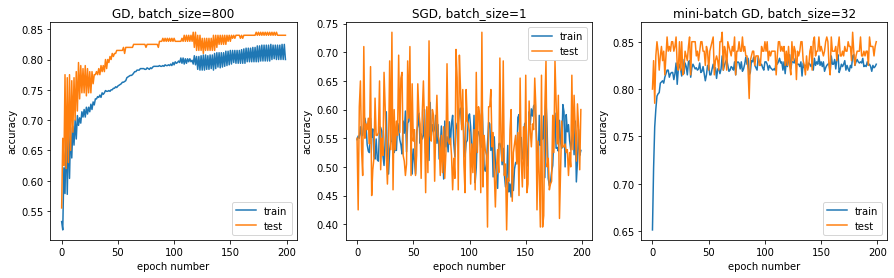

In [ ]:
pyplot.figure(figsize=(15,4))

pyplot.subplot(1,3,1)
pyplot.plot(historyGD.history['accuracy'], label='train')
pyplot.plot(historyGD.history['val_accuracy'], label='test')
pyplot.xlabel('epoch number')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.title('GD, batch_size=800')

pyplot.subplot(1,3,2)
pyplot.plot(historySGD.history['accuracy'], label='train')
pyplot.plot(historySGD.history['val_accuracy'], label='test')
pyplot.title('SGD, batch_size=1')
pyplot.xlabel('epoch number')
pyplot.ylabel('accuracy')
pyplot.legend()


pyplot.subplot(1,3,3)
pyplot.plot(history32.history['accuracy'], label='train')
pyplot.plot(history32.history['val_accuracy'], label='test')
pyplot.title('mini-batch GD, batch_size=32')
pyplot.xlabel('epoch number')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()

Basically, large batch_size means more stable performance, and small (but not too small) batch_size means achieving the same level of performance within less epochs. Meanwhile, we also notice that with large batch_size, we can finish the same number of epochs in less time. In practice, you will need to adjust the batch_size to balance all the affect. 